<a href="https://colab.research.google.com/github/nurfnick/Mathematical_Musings/blob/main/NonlinearDimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Coding Companion to Nonlinear Dimensionality Reduction

by [N. C. Jacob](https://github.com/nurfnick)

Based on text **Nonlinear Dimensionality Reduction** by Lee and Verleysen


I am interested in recreating the linear embeddings from \S 2.4.5  I'll start by creating some random variables in 2D, projecting them into 3D in a variety of ways and bringing them back down to 2D using PCA.  Let's see what happens!

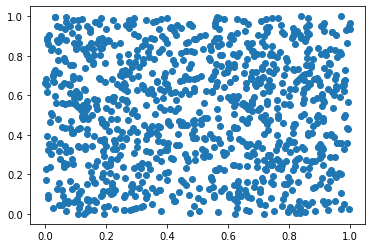

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.rand(1000,2)

plt.scatter(x[:,0],x[:,1])


I want to do a little better with my distribution, this will need too much pre-processing.

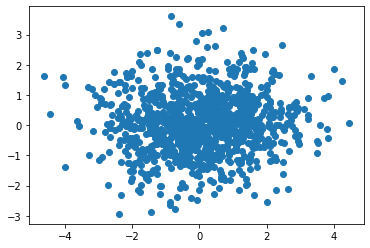

In [45]:
x = np.random.multivariate_normal([0,0],#mean
                                  [[2,0],[0,1]],#covariance
                                  [1000])#size

plt.scatter(x[:,0],x[:,1])

I think I am satisfied with this as my distribution.  I'll now transform it linearly as suggested in the text with 
$$
\left[
\begin{array}{cc}
0.2&0.8\\
0.4&0.5\\
0.7&0.3
\end{array}
\right ]
$$

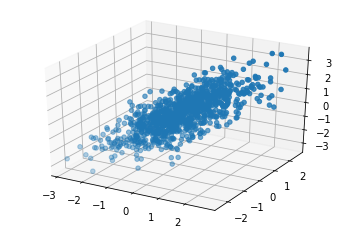

In [46]:
w = np.array([[.2,.8],[.4,.5],[.7,.3]])

x3 = w@x.T

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x3[0,:], x3[1,:], x3[2,:])

Now that the data is in 3D, we'll apply the PCA and reduce it back to 2D.

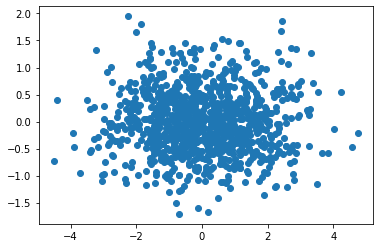

In [51]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=3)
x2 = pca.fit_transform(x3.T)

plt.scatter(x2[:,0],x2[:,1])

In [53]:
pca.explained_variance_ratio_

array([8.61476710e-01, 1.38523290e-01, 7.89391828e-33])

I include the explained ratio here to show that the last entry is effectively zero.  There is no contribution to the picture in the third dimension.  Of course we should know that as this was a linear transformation.  

Let's repeat the process *but* do a nonlinear transformation.

$$
\left[
\begin{array}{c}
4\cos(\frac14 x_1)\\
4\sin(\frac14 x_1)\\ 
x_1+x_2
\end{array}
\right]
$$

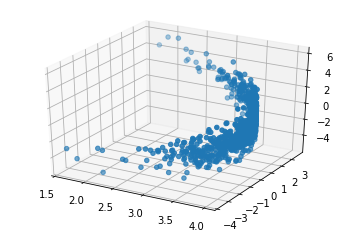

In [57]:
xnonlinear = np.array([4*np.cos(1/4 * x[:,0]),4*np.sin(1/4 * x[:,0]),x[:,0]+x[:,1]])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xnonlinear[0,:], xnonlinear[1,:], xnonlinear[2,:])

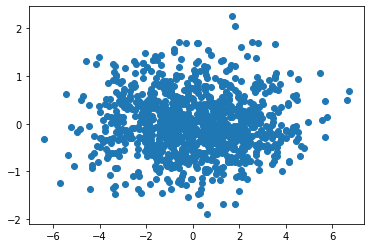

In [62]:
pca = decomposition.PCA(n_components=3)
x2 = pca.fit_transform(xnonlinear.T)

plt.scatter(x2[:,0],x2[:,1])